# Task 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [50, 5]


# read dataset
df = pd.read_csv('secondaries.csv')
df.head()

In [ ]:
# new column for spread values from formula
df['spread'] = df['bid_yield']-df['ask_yield']

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 0.1,security_id,amount,issue_date,issue_yield,maturity_date,coupon_class,commission_percent,current_amount_outstanding,cusip,coupon_rate,currency,isin,capital_tier,seniority,name,sector,trade_date,bid_yield,ask_yield,high_yield,low_yield,spread
0,0,0,54192,1.295000e+09,2014-11-10,NaN,2044-11-10,FIX,NaN,1.295000e+09,NaN,4.70,USD,XS1130524066,NaN,Senior Unsecured,AT&T Inc,50101020,2019-08-16,432.40,427.40,433.0,426.0,5.00
1,1,1,54819,2.619000e+09,2015-02-12,NaN,2045-02-12,FIX,NaN,2.619000e+09,NaN,4.60,USD,XS1182633591,NaN,Senior Unsecured,AT&T Inc,50101020,2019-08-16,-408.70,-433.20,430.2,-474.0,24.50
2,2,2,56925,1.430000e+09,2017-03-21,NaN,2047-06-15,FIX,NaN,1.430000e+09,NaN,5.50,USD,XS1572325683,NaN,Senior Unsecured,AT&T Inc,50101020,2019-08-16,441.60,436.60,442.1,435.2,5.00
3,3,3,57156,1.278679e+09,2018-04-10,NaN,2037-08-15,FIX,NaN,1.278679e+09,NaN,4.90,USD,USU04644CJ46,NaN,Senior Unsecured,AT&T Inc,50101020,2019-08-16,393.70,388.60,400.2,389.3,5.10
4,4,4,18028,3.043810e+09,2013-06-18,NaN,2045-06-15,FIX,NaN,3.043810e+09,00206RBK7,4.35,USD,US00206RBK77,NaN,Senior Unsecured,AT&T Inc,50101020,2019-08-16,411.09,406.03,411.7,402.8,5.06


# check for anomalous columns with frequency distributions

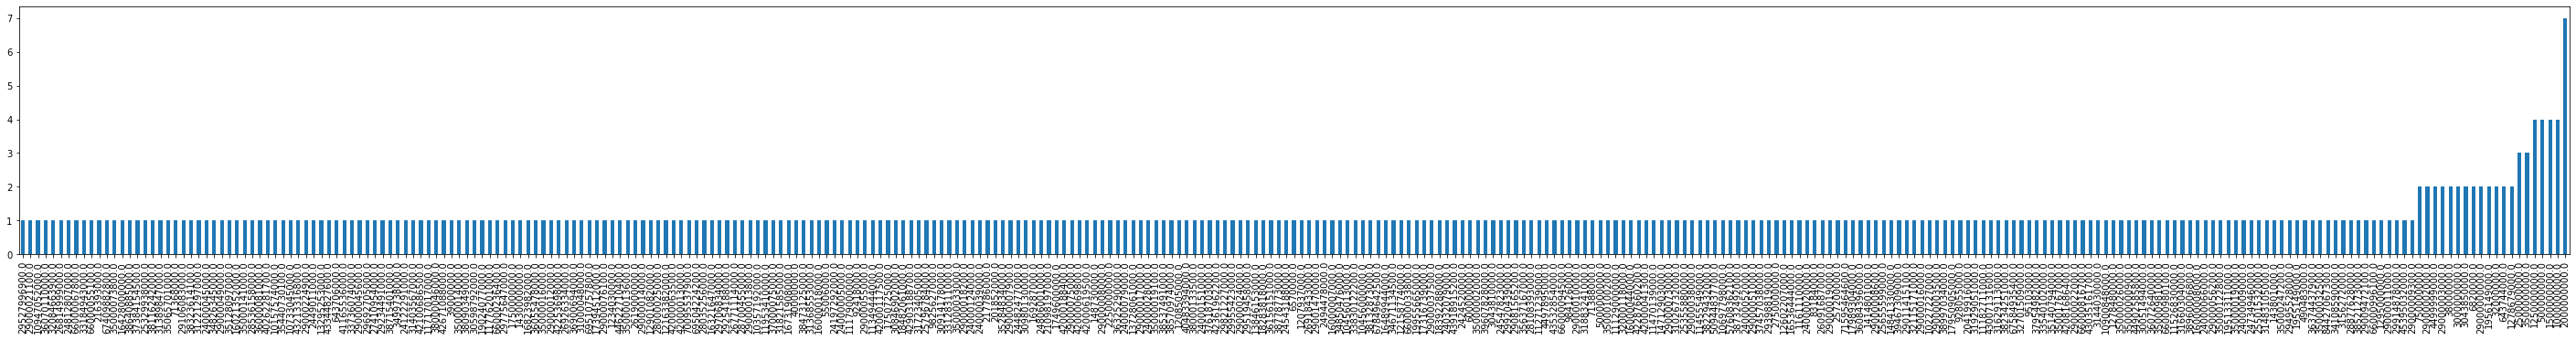

In [93]:
df['amount'].value_counts().sort_values().plot.bar()

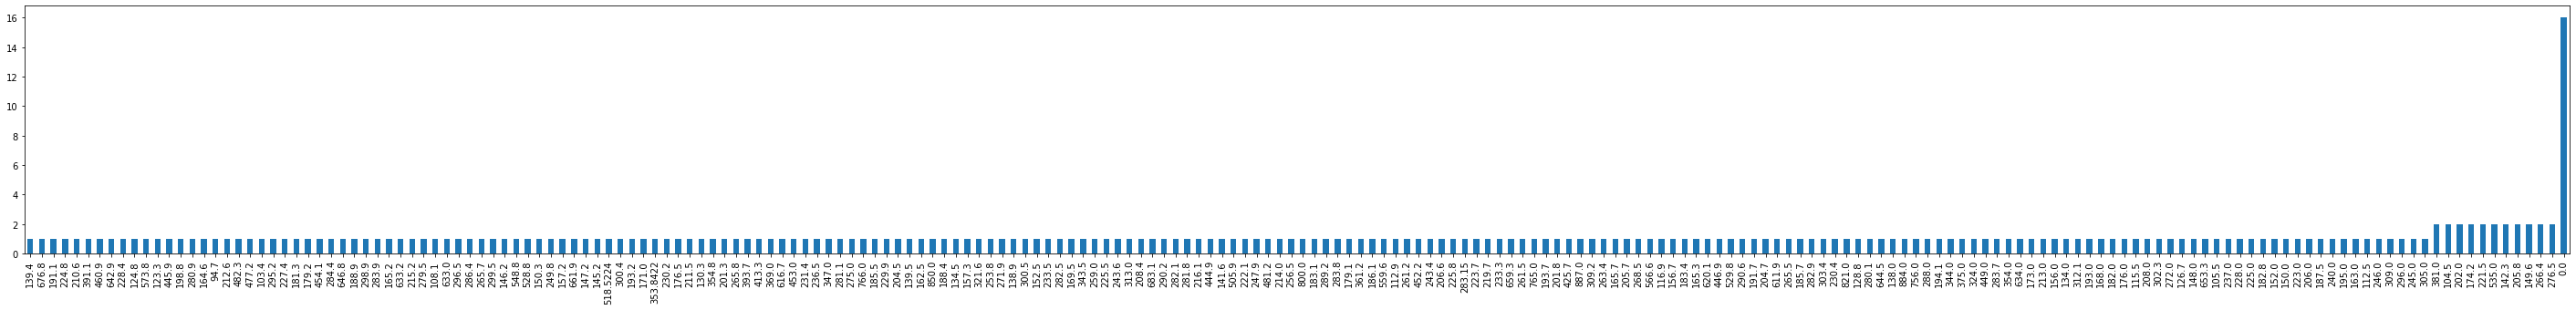

In [92]:
df['issue_yield'].value_counts().sort_values().plot.bar()

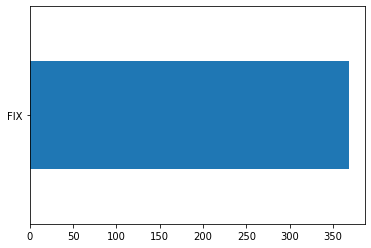

In [ ]:
df['coupon_class'].value_counts().plot.barh()

In [ ]:
df['commission_percent'].value_counts()

Series([], Name: commission_percent, dtype: int64)

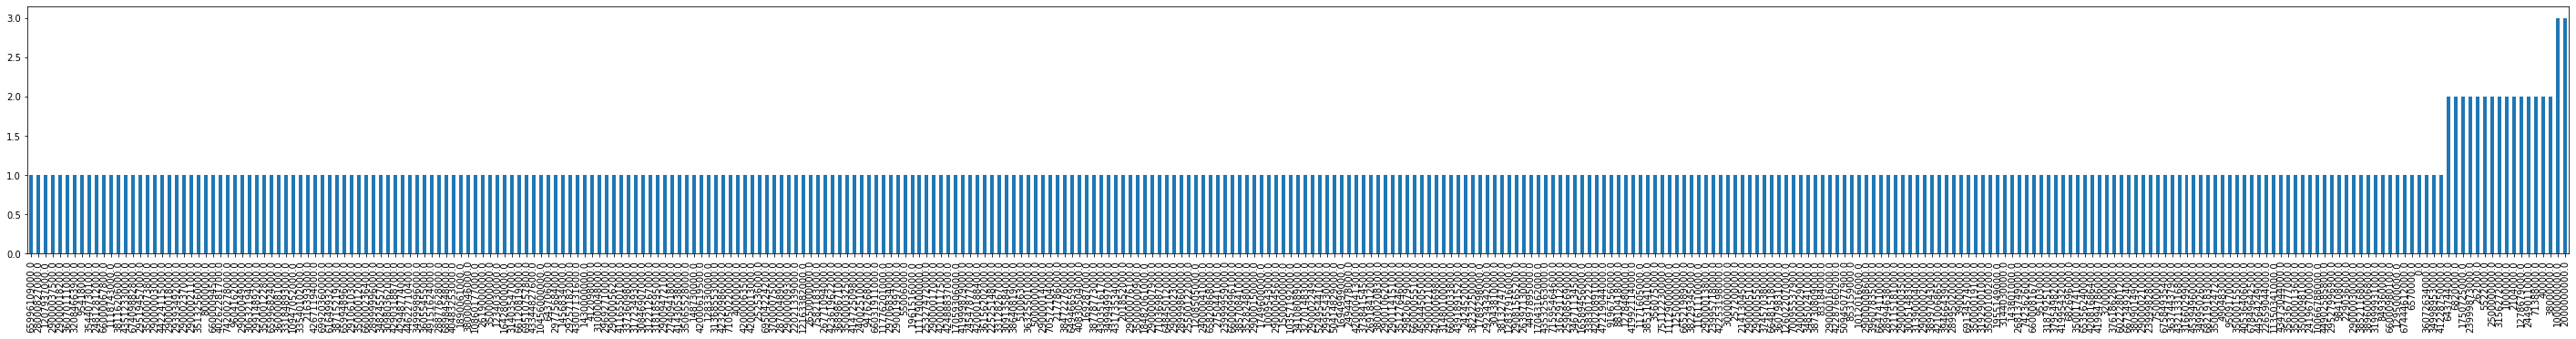

In [86]:
df['current_amount_outstanding'].value_counts().sort_values().plot.bar()

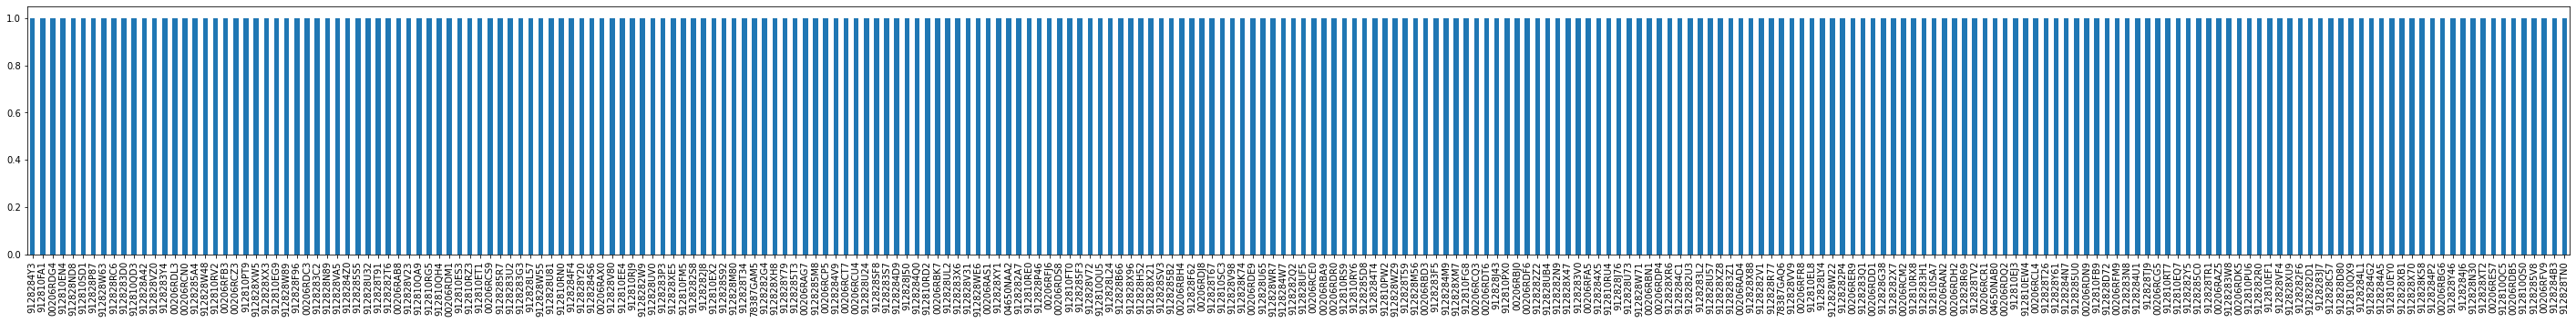

In [ ]:
df['cusip'].value_counts().plot.bar()

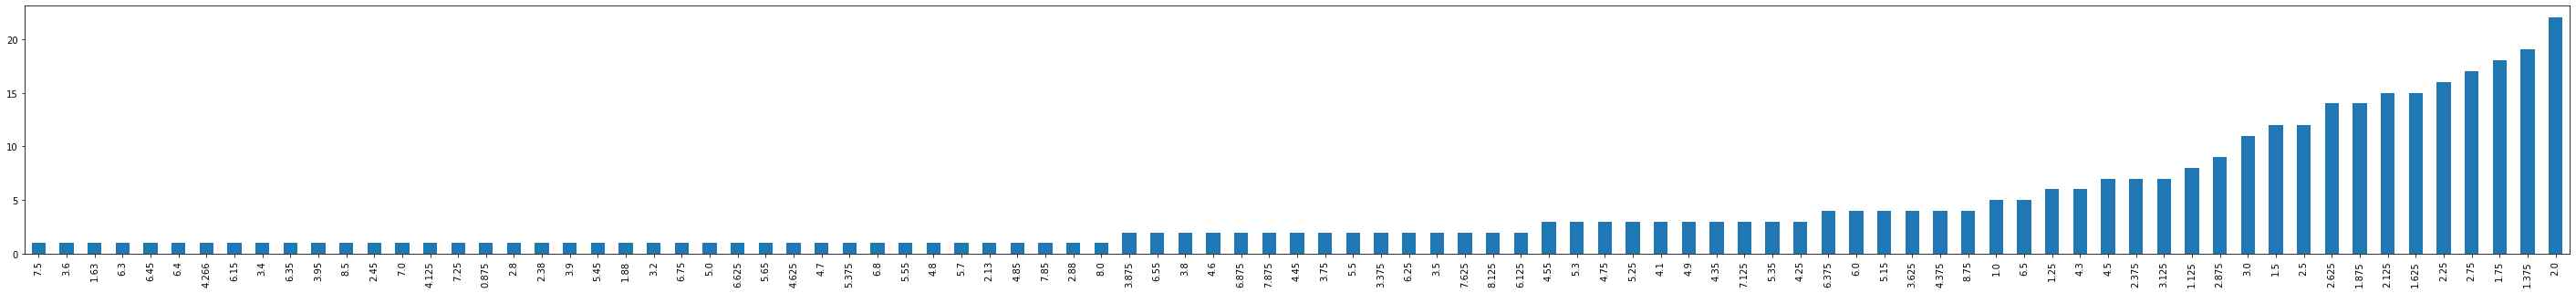

In [87]:
df['coupon_rate'].value_counts().sort_values().plot.bar()

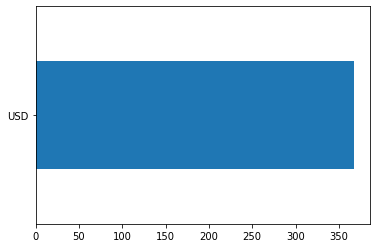

In [ ]:
df['currency'].value_counts().plot.barh()

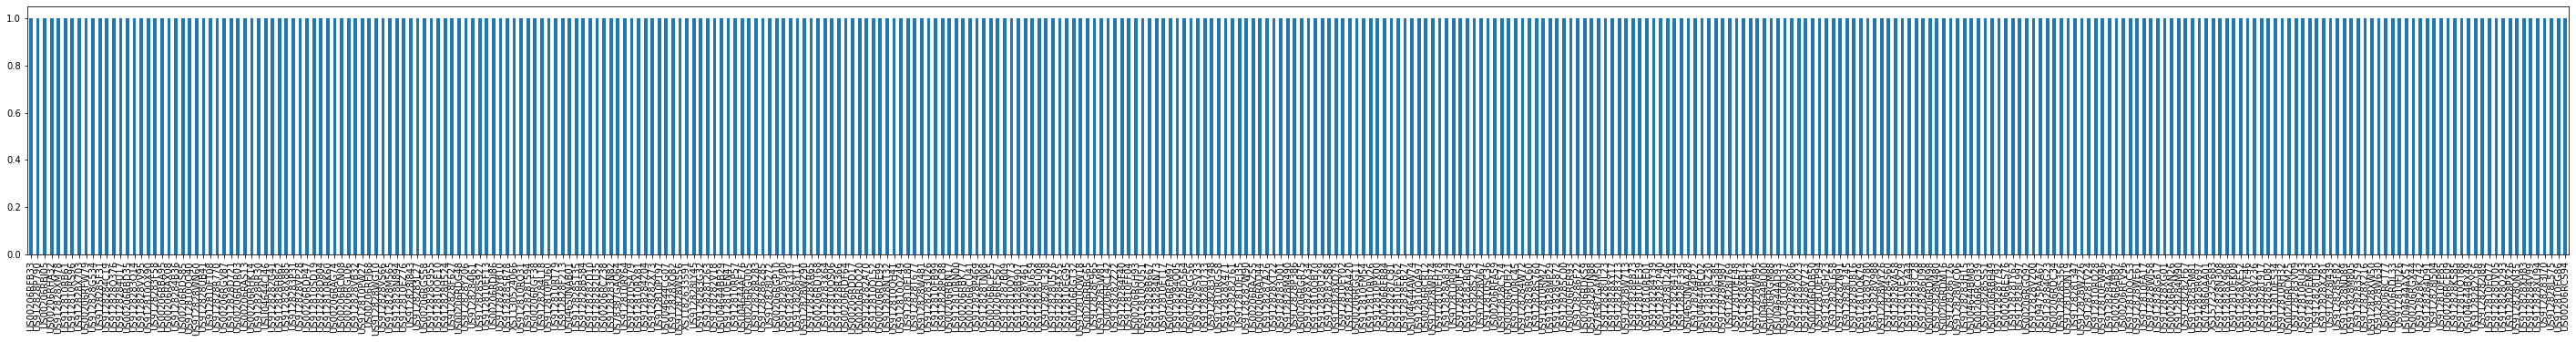

In [ ]:
df['isin'].value_counts().plot.bar()

In [ ]:
df['capital_tier'].value_counts()

Series([], Name: capital_tier, dtype: int64)

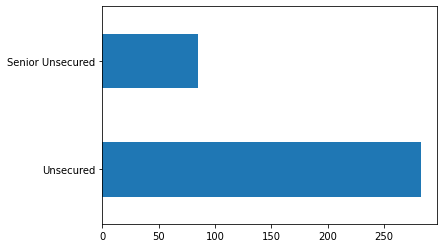

In [ ]:
df['seniority'].value_counts().plot.barh()

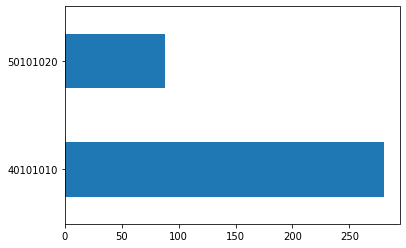

In [ ]:
df['sector'].value_counts().plot.barh()

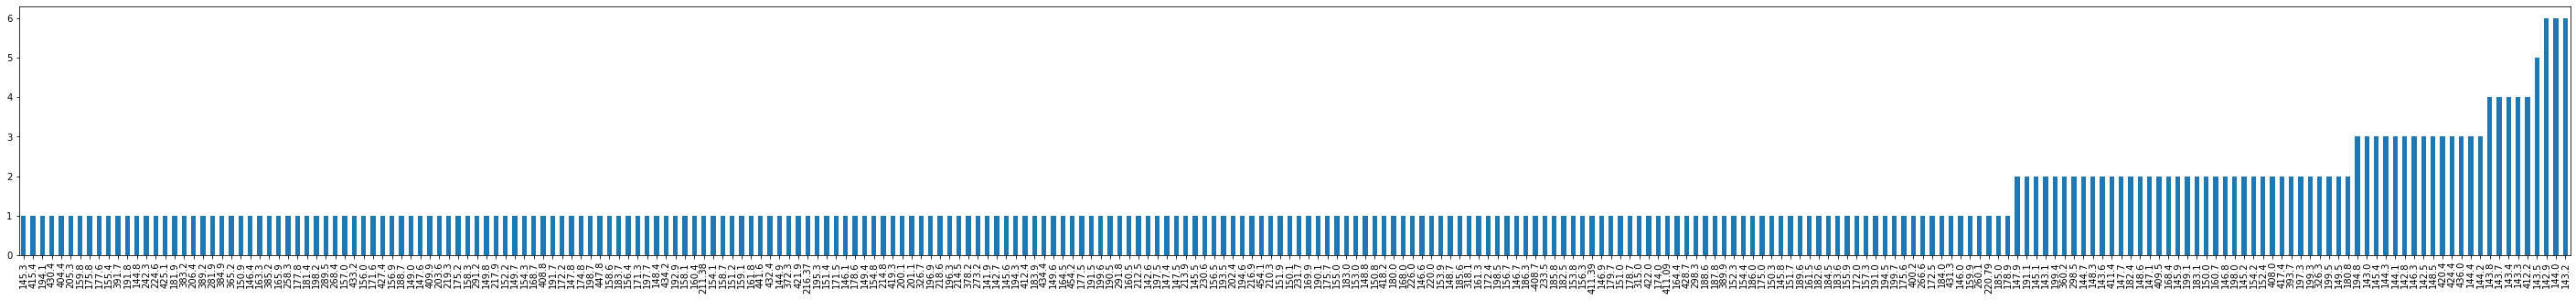

In [88]:
df['bid_yield'].value_counts().sort_values().plot.bar()

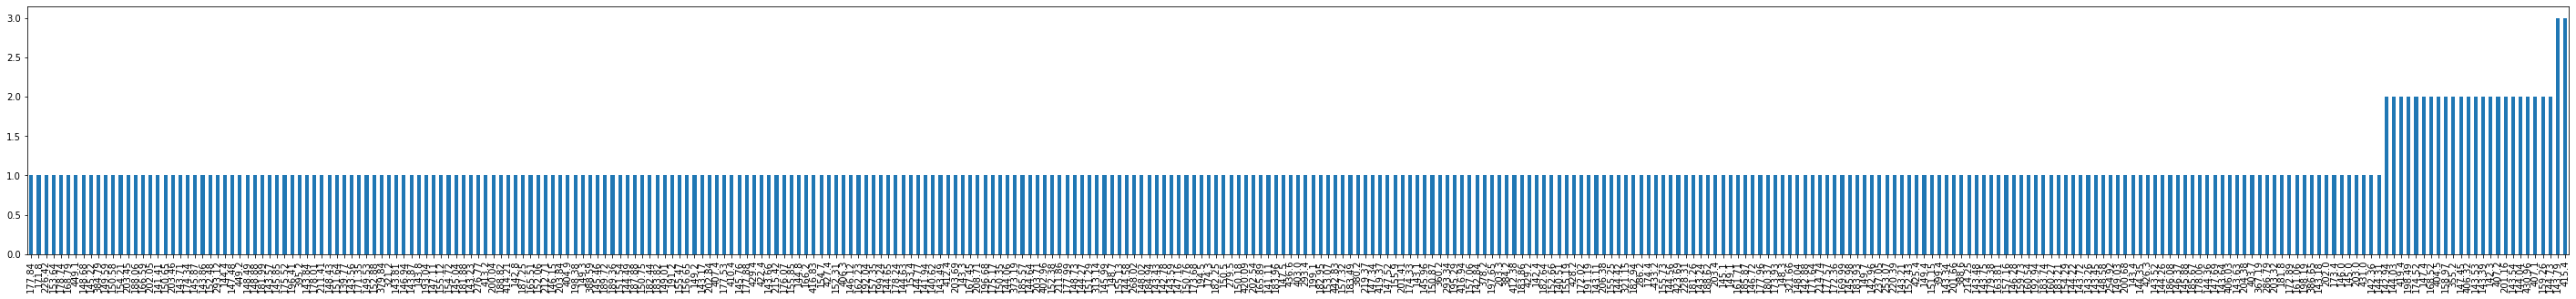

In [89]:
df['ask_yield'].value_counts().sort_values().plot.bar()

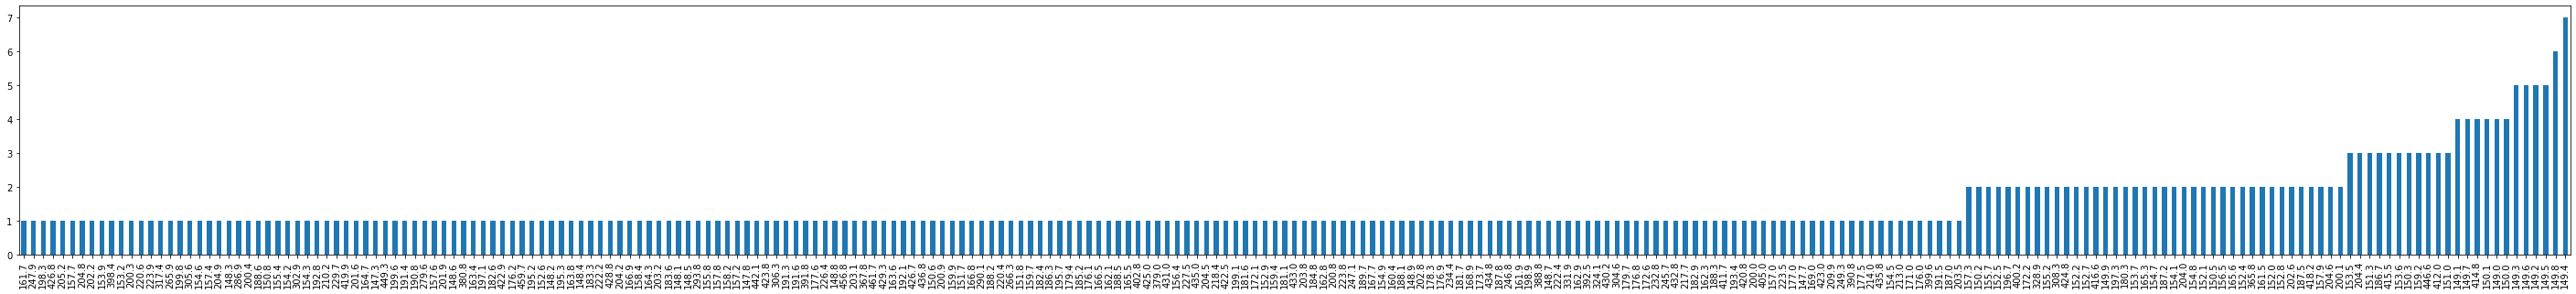

In [90]:
df['high_yield'].value_counts().sort_values().plot.bar()

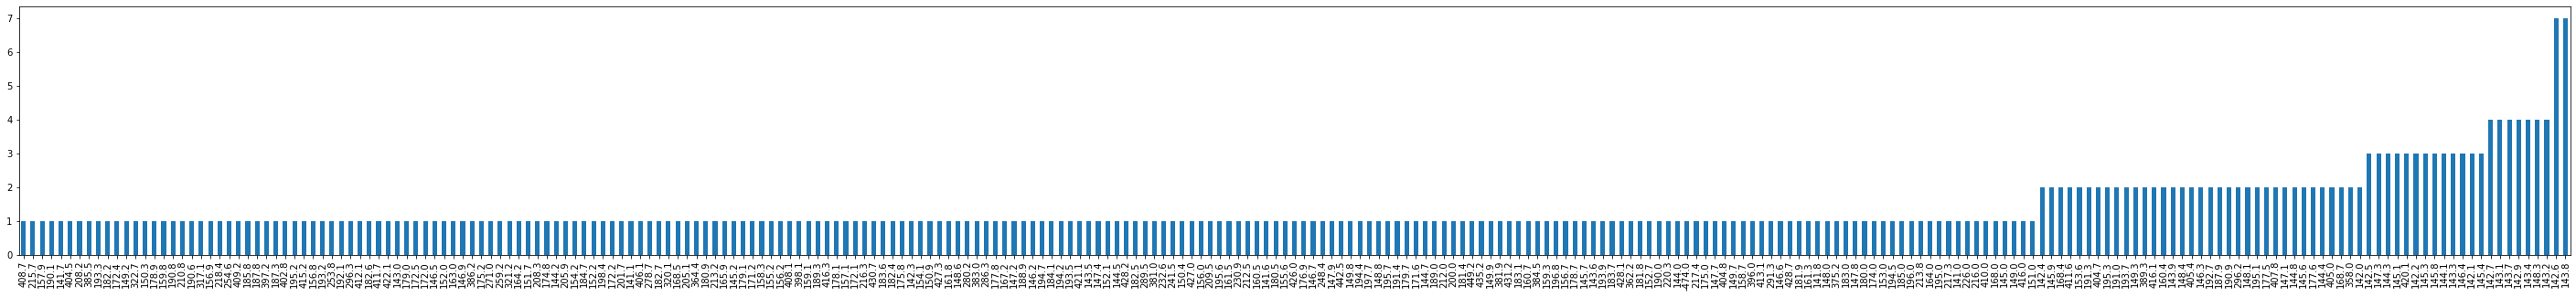

In [91]:
df['low_yield'].value_counts().sort_values().plot.bar()

# deleting anomaly from issue_yield column
## it has an anomaly with 0 value of high frequency that is abnormal

In [94]:
# anomalous column cleaning
df = df[df.issue_yield != 0]

In [95]:
df.head()

,Unnamed: 0,Unnamed: 0.1,security_id,amount,issue_date,issue_yield,maturity_date,coupon_class,commission_percent,current_amount_outstanding,cusip,coupon_rate,currency,isin,capital_tier,seniority,name,sector,trade_date,bid_yield,ask_yield,high_yield,low_yield,spread
0,0,0,54192,1.295000e+09,2014-11-10,NaN,2044-11-10,FIX,NaN,1.295000e+09,NaN,4.70,USD,XS1130524066,NaN,Senior Unsecured,AT&T Inc,50101020,2019-08-16,432.40,427.40,433.0,426.0,5.00
1,1,1,54819,2.619000e+09,2015-02-12,NaN,2045-02-12,FIX,NaN,2.619000e+09,NaN,4.60,USD,XS1182633591,NaN,Senior Unsecured,AT&T Inc,50101020,2019-08-16,-408.70,-433.20,430.2,-474.0,24.50
2,2,2,56925,1.430000e+09,2017-03-21,NaN,2047-06-15,FIX,NaN,1.430000e+09,NaN,5.50,USD,XS1572325683,NaN,Senior Unsecured,AT&T Inc,50101020,2019-08-16,441.60,436.60,442.1,435.2,5.00
3,3,3,57156,1.278679e+09,2018-04-10,NaN,2037-08-15,FIX,NaN,1.278679e+09,NaN,4.90,USD,USU04644CJ46,NaN,Senior Unsecured,AT&T Inc,50101020,2019-08-16,393.70,388.60,400.2,389.3,5.10
4,4,4,18028,3.043810e+09,2013-06-18,NaN,2045-06-15,FIX,NaN,3.043810e+09,00206RBK7,4.35,USD,US00206RBK77,NaN,Senior Unsecured,AT&T Inc,50101020,2019-08-16,411.09,406.03,411.7,402.8,5.06


In [107]:
# datetime to year conversion
df['maturity_year'] = df['maturity_date'].astype('datetime64[ns]').dt.year
df['trade_year'] = df['trade_date'].astype('datetime64[ns]').dt.year
df['tenor'] = df['maturity_year'] - df['trade_year']
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Unnamed: 0,Unnamed: 0.1,security_id,amount,issue_date,issue_yield,maturity_date,coupon_class,commission_percent,current_amount_outstanding,cusip,coupon_rate,currency,isin,capital_tier,seniority,name,sector,trade_date,bid_yield,ask_yield,high_yield,low_yield,spread,maturity_year,trade_year,tenor
0,0,0,54192,1.295000e+09,2014-11-10,NaN,2044-11-10,FIX,NaN,1.295000e+09,NaN,4.70,USD,XS1130524066,NaN,Senior Unsecured,AT&T Inc,50101020,2019-08-16,432.40,427.40,433.0,426.0,5.00,2044,2019,25
1,1,1,54819,2.619000e+09,2015-02-12,NaN,2045-02-12,FIX,NaN,2.619000e+09,NaN,4.60,USD,XS1182633591,NaN,Senior Unsecured,AT&T Inc,50101020,2019-08-16,-408.70,-433.20,430.2,-474.0,24.50,2045,2019,26
2,2,2,56925,1.430000e+09,2017-03-21,NaN,2047-06-15,FIX,NaN,1.430000e+09,NaN,5.50,USD,XS1572325683,NaN,Senior Unsecured,AT&T Inc,50101020,2019-08-16,441.60,436.60,442.1,435.2,5.00,2047,2019,28
3,3,3,57156,1.278679e+09,2018-04-10,NaN,2037-08-15,FIX,NaN,1.278679e+09,NaN,4.90,USD,USU04644CJ46,NaN,Senior Unsecured,AT&T Inc,50101020,2019-08-16,393.70,388.60,400.2,389.3,5.10,2037,2019,18
4,4,4,18028,3.043810e+09,2013-06-18,NaN,2045-06-15,FIX,NaN,3.043810e+09,00206RBK7,4.35,USD,US00206RBK77,NaN,Senior Unsecured,AT&T Inc,50101020,2019-08-16,411.09,406.03,411.7,402.8,5.06,2045,2019,26


# spread curve

In [126]:
# spread curve without grouping
clean_df = df[['name', 'tenor', 'spread', 'currency']]
clean_df.head(100).sort_values('tenor')

,name,tenor,spread,currency
28,United States Treasury,0,10.56,USD
53,United States Treasury,1,2.11,USD
37,United States Treasury,1,5.04,USD
42,United States Treasury,1,2.44,USD
33,United States Treasury,1,5.09,USD
...,...,...,...,...
17,United States Treasury,29,-4.22,USD
14,AT&T Inc,29,5.00,USD
5,AT&T Inc,29,5.00,USD
8,AT&T Inc,30,5.00,USD


## spread curve data with the standard year bins

In [127]:
bins = [2, 3, 5, 7, 10, 30]
clean_df['binned_year'] = pd.cut(df['tenor'], bins)
clean_df[['binned_year', 'name', 'spread', 'currency']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,binned_year,name,spread,currency
0,"(10, 30]",AT&T Inc,5.00,USD
1,"(10, 30]",AT&T Inc,24.50,USD
2,"(10, 30]",AT&T Inc,5.00,USD
3,"(10, 30]",AT&T Inc,5.10,USD
4,"(10, 30]",AT&T Inc,5.06,USD
...,...,...,...,...
363,"(10, 30]",United States Treasury,-3.86,USD
364,"(10, 30]",United States Treasury,-3.96,USD
365,"(10, 30]",United States Treasury,-3.90,USD
366,"(10, 30]",United States Treasury,-4.04,USD


## Binned spread curve data by average aggregation

In [135]:
# spread avg. values
final = clean_df.groupby(['binned_year', 'name', 'currency'])['spread'].mean()
final

binned_year  name                    currency
(2, 3]       AT&T Inc                USD         5.182000
             United States Treasury  USD         0.670000
(3, 5]       AT&T Inc                USD         5.237500
             United States Treasury  USD        -0.013043
(5, 7]       AT&T Inc                USD         5.196667
             United States Treasury  USD        -0.216400
(7, 10]      AT&T Inc                USD         5.065000
             United States Treasury  USD         0.067333
(10, 30]     AT&T Inc                USD         5.470222
             United States Treasury  USD        -3.145532
Name: spread, dtype: float64